# Data acquisition in arbok

### Arbok module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from arbok.samples.aurora.configs.aurora_qua_config import aurora_qua_config
from arbok.core.program import Program
from arbok.core.sample import Sample

2023-09-19 16:34:01,092 - qm - INFO     - Starting session: 8bbb6368-bb56-4ab0-bf9a-4cfc2e6674cb


Instanciating sample and measurement objects

In [2]:
aurora = Sample('aurora', aurora_qua_config)
ESR_search = Program('ESR_search', sample = aurora)

In [3]:
from arbok.samples.aurora.configs.aurora_qua_config import aurora_qua_config

from arbok.samples.aurora.initialization.odd_6_dot_init import InitOdd6dot
from arbok.samples.aurora.control.rabi import Rabi
from arbok.samples.aurora.readout.psb_6_dot_read import PSB6dotRead

Creating Subsequences and adding them to the measurement object `ESR_search`

## Rabi chevron sequence creation

In [4]:
init6 = InitOdd6dot('init6')
read6 = PSB6dotRead('read6')
rabi6 = Rabi('rabi6')

In [5]:
RabiChevron = Program('RabiChevron', sample = aurora)

RabiChevron.add_subsequence(init6)
RabiChevron.add_subsequence(rabi6)
RabiChevron.add_subsequence(read6)

In [6]:
f_detune=np.arange(33.25e6,34.2e6,0.025e6, dtype = int)
print(len(f_detune))
t_list = np.arange(4,30e3/4,150, dtype = int)
print(len(t_list))

38
50


In [7]:
RabiChevron.settables = [
    RabiChevron.rabi6.IfQ1,
    RabiChevron.rabi6.tRabi]
RabiChevron.setpoints_grid = [
    f_detune,
    t_list]
RabiChevron.gettables = [
    RabiChevron.read6.diff_set2_state]

RabiChevron.connect_opx(host_ip= '192.168.0.3')

2023-09-19 16:34:01,565 - qm - INFO     - Performing health check
2023-09-19 16:34:01,622 - qm - INFO     - Health check passed
2023-09-19 16:34:05,180 - qm - WARNING  - Open QM ended with warning 0: Opening a new Quantum Machine and closing existing identical Quantum Machine qm-1695105296506
2023-09-19 16:34:05,180 - qm - WARNING  - Open QM ended with warning 0: Quantum Machine qm-1695105296506 is canceling running job 1684735462264.


In [8]:
rabi_chevron_program = RabiChevron.get_program()
RabiChevron.run(rabi_chevron_program)

Adding qua <class 'int'> variable for IfQ1
Adding qua <class 'int'> variable for tRabi
Adding qua sweep loop for tRabi
Adding qua sweep loop for IfQ1
2023-09-19 16:34:06,178 - qm - INFO     - Sending program to QOP for compilation
2023-09-19 16:34:35,879 - qm - INFO     - Executing program


In [9]:
RabiChevron.prepare_gettables()

<Arrays, shape: (50,)>
<Arrays, shape: (38,)>


##  Rabi Chevron in QCoDeS framework

In [10]:
import os
import qcodes as qc
from qcodes.dataset import (
    Measurement,
    initialise_or_create_database_at,
    load_or_create_experiment,
    plot_dataset,
)

In [11]:
tutorial_db_path = os.path.join(os.getcwd(), "example_dbs/experiments_for_15_mins.db")
initialise_or_create_database_at(tutorial_db_path)
load_or_create_experiment(experiment_name='Rabi_Chevron', sample_name="aurora")

Rabi_Chevron#aurora#2@C:\Users\labuser\GitRepos\arbok\arbok\examples\example_dbs\experiments_for_15_mins.db
-----------------------------------------------------------------------------------------------------------
38-results-1-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state-0
39-results-2-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,iteration-0
40-results-3-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,RabiChevron_iteration-0
41-results-4-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,RabiChevron_iteration-141
42-results-5-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,RabiChevron_iteration-20
43-results-6-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,RabiChevron_iteration-20
44-results-7-rabi6_IfQ1,rabi6_tRabi,RabiChevron_iteration,diff_set1_state,diff_set2_state-0
45-results-8-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,RabiChevron_iteration-20
46-results-9-rabi6_IfQ1,rabi6_tRabi,diff_set1_state,diff_set2_state,RabiChevr

In [12]:
qc.logger.start_all_logging()

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\labuser\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\labuser\.qcodes\logs\230919-45840-qcodes.log


In [13]:
# import IPython.lib.backgroundjobs as bg
# from plottr.apps import inspectr

# jobs = bg.BackgroundJobManager()
# jobs.new(inspectr.main, qc.config.core.db_location)

In [14]:
meas = Measurement()

2023-09-19 16:34:39,828 - qm - INFO     - Performing health check
2023-09-19 16:34:40,711 - qm - INFO     - Health check passed
Adding qua <class 'numpy.ndarray'> variable for tRabi
Adding qua <class 'numpy.ndarray'> variable for IfQ1
Adding qua sweep loop for IfQ1
Adding qua sweep loop for tRabi
2023-09-19 16:34:43,405 - qm - INFO     - Simulating program


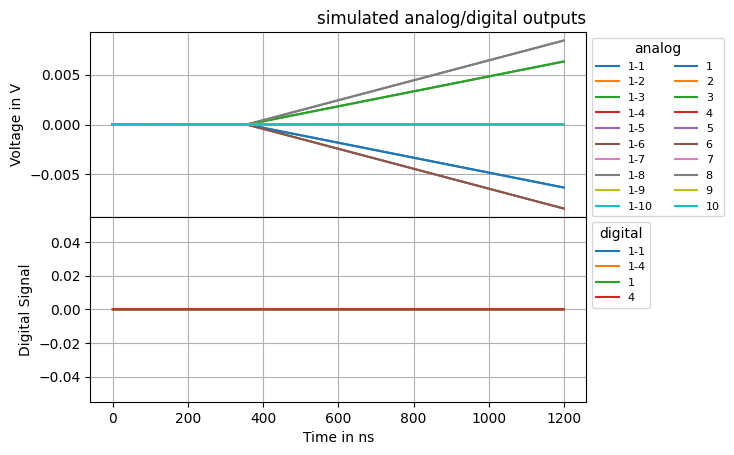

In [15]:
RabiChevron.run_remote_simulation(300)

In [ ]:
dataset = RabiChevron.run_qc_measurement(meas, shots=300)

Starting experimental run with id: 93. 
2023-09-19 16:34:56,294 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:34:58,845 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:01,071 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:03,377 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:05,664 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:08,305 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:10,604 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:12,876 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:14,662 - qm - WARNING  - Fetching single result will always return the single value
2023-09-19 16:35:16,567 - qm - WARNING  - Fetching 